# 1. Install the libraries

In [4]:
!pip install transformers biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.7 MB/s eta 0:00:00


# 2. Import the libraries

In [5]:
from transformers import BertTokenizer, BertModel
from Bio import SeqIO
from torch.utils.data import Dataset
import torch
import os

# 3. Load ProtBERT Tokenizer and Model

In [6]:
# Load the pretrained tokenizer and model
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

# 4. FASTA Parsing and Preprocessing Functions

In [7]:
# Parse FASTA file
def parse_fasta(fasta_path):
    sequences = []
    for record in SeqIO.parse(fasta_path, "fasta"):
        seq = str(record.seq)
          # Check if sequence contains only standard amino acids
        if set(seq).issubset(set("ACDEFGHIKLMNPQRSTVWY")):
            sequences.append(seq)
    return sequences  #string format

# Preprocess sequence: add spaces between amino acids
def preprocess_sequence(sequence):
    return ' '.join(list(sequence))

# 5. Tokenization Function

In [8]:
# Tokenize sequences
def tokenize_sequences(sequences, tokenizer, max_length=512):
    preprocessed = [preprocess_sequence(seq) for seq in sequences]
    return tokenizer(
        preprocessed,
        return_tensors='pt',
        padding=True,
        truncation=True,
        max_length=max_length
    )

# 6. PyTorch Dataset for Protein Sequences

In [9]:
# PyTorch Dataset
class ProteinDataset(Dataset):
    def __init__(self, sequences, tokenizer):
        self.data = tokenize_sequences(sequences, tokenizer)

    def __len__(self):
        return self.data['input_ids'].shape[0]

    def __getitem__(self, idx):
        return {
            'input_ids': self.data['input_ids'][idx],
            'attention_mask': self.data['attention_mask'][idx]
        }

# 7. Upload and Read FASTA File in Colab

In [10]:
from google.colab import files

uploaded = files.upload()

fasta_filename = next(iter(uploaded))
sequences = parse_fasta(fasta_filename)
sequences = sequences[:100]

Saving uniprotkb_AND_reviewed_true_AND_model_o_2025_04_07.fasta to uniprotkb_AND_reviewed_true_AND_model_o_2025_04_07.fasta


# 8. Create Dataset and Test One Sample

In [11]:
# Parse FASTA file
def parse_fasta(fasta_path):
    sequences = []
    for record in SeqIO.parse(fasta_path, "fasta"):
        seq = str(record.seq)
        # Check if sequence contains only valid amino acids and is not empty
        if seq and set(seq).issubset(set("ACDEFGHIKLMNPQRSTVWY")):
            sequences.append(seq)
    return sequences

# Preprocess sequence: add spaces between amino acids
def preprocess_sequence(sequence):
    return ' '.join(list(sequence))

# Tokenize sequences
def tokenize_sequences(sequences, tokenizer, max_length=512):
    preprocessed = [preprocess_sequence(seq) for seq in sequences]
    # Add error handling for empty sequences
    if not preprocessed:
        return tokenizer.encode_plus("", return_tensors="pt")  # Handle empty sequence
    else:
        return tokenizer(
            preprocessed,
            return_tensors='pt',
            padding=True,
            truncation=True,
            max_length=max_length
        )

# 9. Run Sample Through ProtBERT

In [12]:
# Run through ProtBERT
# Create dataset instance
dataset = ProteinDataset(sequences, tokenizer)

# Get a sample from the dataset
sample = dataset[0]  # Get the first sample

with torch.no_grad():
    output = model(
        input_ids=sample['input_ids'].unsqueeze(0),
        attention_mask=sample['attention_mask'].unsqueeze(0)
    )

print("Output shape:", output.last_hidden_state.shape)

Output shape: torch.Size([1, 512, 1024])


# 10. Visualize Embeddings

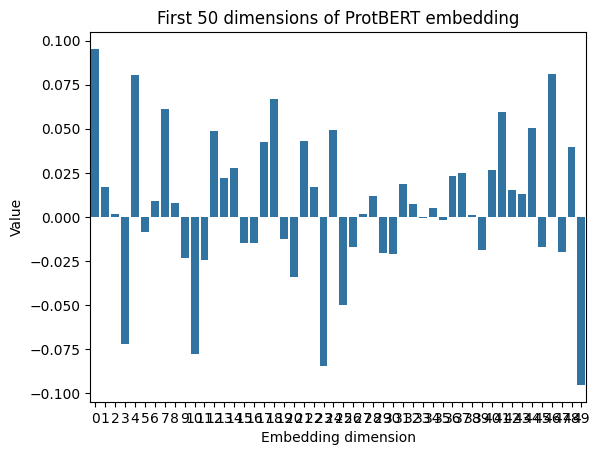

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mean pooling
mean_embedding = output.last_hidden_state.mean(dim=1).squeeze()

sns.barplot(x=list(range(50)), y=mean_embedding[:50].numpy())
plt.title("First 50 dimensions of ProtBERT embedding")
plt.xlabel("Embedding dimension")
plt.ylabel("Value")
plt.show()

# 11. Feature Extraction

In [ ]:
!pip install biopython

In [ ]:
from transformers import BertModel
import torch

# Load the model and move to the appropriate device
model = BertModel.from_pretrained("Rostlab/prot_bert")
model = model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# Assuming `ProteinDataset` and `sequences` are defined in previous cells
from torch.utils.data import DataLoader

# 12. Install + Load ProtBERT

In [ ]:
# Install libraries
!pip install transformers
!pip install torch
!pip install scikit-learn

from transformers import BertModel, BertTokenizer
import torch
import numpy as np

# Load ProtBERT
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")
model.eval()

# Preprocess sequences
def preprocess_sequence(seq):
    return ' '.join(list(seq)).upper()

def extract_embedding(sequence):
    tokens = tokenizer(sequence, return_tensors='pt')
    with torch.no_grad():
        output = model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# 13. Protein Function Prediction (GO/EC)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Example: Duplicate the small dataset to simulate more data (for testing purpose only)
sequences = ["MKWVTFISLLFLFSSAYSR", "GVFRRDTHKSEIAHRF"] * 20  # 40 sequences
labels = [1, 0] * 20  # 40 labels

X = [extract_embedding(preprocess_sequence(seq)) for seq in sequences]
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# 14. Subcellular Localization Prediction

In [ ]:
# Sequences labeled with subcellular location (e.g., cytoplasm = 0, nucleus = 1)
sequences = ["MALWMRLLPLL", "MNIFEMLRID"]
labels = [0, 1]

X = [extract_embedding(preprocess_sequence(seq)) for seq in sequences]
y = np.array(labels)

# Instead of StratifiedKFold or LeaveOneOut, use k-Nearest Neighbors for small datasets
from sklearn.neighbors import KNeighborsClassifier

# Create and train the classifier
clf = KNeighborsClassifier(n_neighbors=1) # Using 1 neighbor for this small dataset
clf.fit(X, y)

# Predict on the entire dataset (as we used all data for training)
y_pred = clf.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# 15. Protein-Protein Interaction (PPI) Prediction



In [ ]:
# Pairs of sequences + binary label (1: interact, 0: no interaction)
pairs = [("MKWVTFISLL", "GVFRRDTHKS"), ("MNIFEMLRID", "MALWMRLLPL")]
labels = [1, 0]

X = []
for seq1, seq2 in pairs:
    emb1 = extract_embedding(preprocess_sequence(seq1))
    emb2 = extract_embedding(preprocess_sequence(seq2))
    pair_emb = np.concatenate([emb1, emb2])  # Concatenate embeddings
    X.append(pair_emb)

y = np.array(labels)

# Instead of train_test_split and LogisticRegression, use KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)  # Using 1 neighbor for this small dataset
clf.fit(X, y)  # Train on the entire dataset

# Predict on the entire dataset (as we used all data for training)
y_pred = clf.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# 16. Protein Structure Prediction (2D/3D)

In [ ]:
# Each sequence has a label per residue (e.g., H/E/C) — simplified here
sequences = ["MKWVTF", "GVFRRD"]
labels = ["HHHEEE", "EECCCC"]  # 1 label per amino acid

# Token-level prediction: convert each amino acid to embedding (averaged over window)
def extract_token_embeddings(sequence):
    tokens = tokenizer(preprocess_sequence(sequence), return_tensors="pt")
    with torch.no_grad():
        output = model(**tokens)
    # Remove special tokens ([CLS], [SEP]) before returning embeddings
    return output.last_hidden_state[0, 1:-1, :].numpy() # shape: (L, hidden_dim)

X = []
y = []
for seq, lbl_seq in zip(sequences, labels):
    emb = extract_token_embeddings(seq)
    # Ensure the number of embeddings and labels match
    # by trimming the longer one to match the shorter
    min_len = min(len(emb), len(lbl_seq))
    X.extend(emb[:min_len])
    y.extend(lbl_seq[:min_len])  # keep per-token labels

# Encode labels (H = 0, E = 1, C = 2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
clf.fit(X, y_encoded)

print("Accuracy:", clf.score(X, y_encoded))

Accuracy: 1.0
